In [23]:
#importing the necessary libraries
import pandas as pd
import numpy as np
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import re
import seaborn as sns


In [2]:
#reading the datasets
development = pd.read_csv('development.csv')
evaluation = pd.read_csv('evaluation.csv')

In [3]:
development.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224994 entries, 0 to 224993
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   sentiment  224994 non-null  int64 
 1   ids        224994 non-null  int64 
 2   date       224994 non-null  object
 3   flag       224994 non-null  object
 4   user       224994 non-null  object
 5   text       224994 non-null  object
dtypes: int64(2), object(4)
memory usage: 10.3+ MB


<AxesSubplot:>

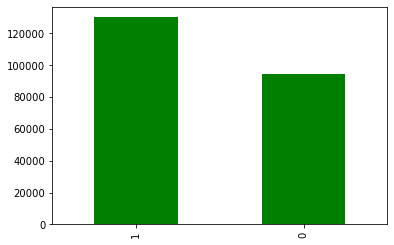

In [4]:
development['sentiment'].value_counts().plot.bar(x='sentiment', y='number of instances', color='green')

In [5]:
development.isnull().sum()

sentiment    0
ids          0
date         0
flag         0
user         0
text         0
dtype: int64

In [6]:
duplicates = development.duplicated().sum()
print(duplicates)

0


In [7]:
df = pd.concat([development, evaluation], sort=False)

In [8]:
df

,sentiment,ids,date,flag,user,text
0,1.0,1833972543,Mon May 18 01:08:27 PDT 2009,NO_QUERY,Killandra,"@MissBianca76 Yes, talking helps a lot.. going..."
1,1.0,1980318193,Sun May 31 06:23:17 PDT 2009,NO_QUERY,IMlisacowan,SUNSHINE. livingg itttt. imma lie on the grass...
2,1.0,1994409198,Mon Jun 01 11:52:54 PDT 2009,NO_QUERY,yaseminx3,@PleaseBeMine Something for your iphone
3,0.0,1824749377,Sun May 17 02:45:34 PDT 2009,NO_QUERY,no_surprises,@GabrielSaporta couldn't get in to the after p...
4,0.0,2001199113,Tue Jun 02 00:08:07 PDT 2009,NO_QUERY,Rhi_ShortStack,@bradiewebbstack awww is andy being mean again...
...,...,...,...,...,...,...
74994,NaN,1933009490,Tue May 26 22:45:42 PDT 2009,NO_QUERY,Irv25,"@NIYANA man down,code 10...I'm going 2 try &am..."
74995,NaN,1563759085,Mon Apr 20 00:08:25 PDT 2009,NO_QUERY,iHomeTech,@senhordaguerra Thank you for following me: I ...
74996,NaN,1754026098,Sun May 10 04:38:13 PDT 2009,NO_QUERY,danger_skies,Why isn't Friday's Hollyoaks available for dow...
74997,NaN,2288725776,Mon Jun 22 19:32:13 PDT 2009,NO_QUERY,tracyewilli,@hollywilli she WAS !!! she was a MADAM they q...


In [9]:
data_dropped = df.drop(columns=["ids", "date", "flag", "user"])
data_dropped.head()

,sentiment,text
0,1.0,"@MissBianca76 Yes, talking helps a lot.. going..."
1,1.0,SUNSHINE. livingg itttt. imma lie on the grass...
2,1.0,@PleaseBeMine Something for your iphone
3,0.0,@GabrielSaporta couldn't get in to the after p...
4,0.0,@bradiewebbstack awww is andy being mean again...


In [10]:
data = data_dropped.copy()

In [11]:
#creating a custom dictionary for emoticon replacement
emoticons = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

In [12]:
#function cleans the data by removing URLS, replacing emoticons with their sentiment, removing usernames,
#removing numbers and replacing all 3 or more consecutive letter by 2
#in the end it applies lemmatization
def clean_data(data):
    cleanData = []
    
    wordLemm = WordNetLemmatizer()
    
    # Defining regex patterns.
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
    for text in data:
        text = text.lower()
        
        text = re.sub(urlPattern,'',text)
        for emoticon in emoticons.keys():
            text = text.replace(emoticon, "emoticon" + emoticons[emoticon])        
        text = re.sub(userPattern,'', text)        
        text = re.sub(alphaPattern, " ", text)
        text = re.sub(sequencePattern, seqReplacePattern, text)
        
        words = ''
        for word in text.split():

            if len(word)>1:
                word = wordLemm.lemmatize(word)
                words += (word+' ')
                
        cleanData.append(words)
        
    return cleanData

In [13]:
#cleaning the data with clean_data method
data['text'] = clean_data(data['text'])

In [14]:
data.head(10)

,sentiment,text
0,1.0,yes talking help lot going through it there no...
1,1.0,sunshine livingg itt imma lie on the grass lis...
2,1.0,something for your iphone
3,0.0,couldn get in to the after party
4,0.0,aww is andy being mean again now want maccas
5,0.0,getting so anxious about tomorrow help
6,1.0,the doctor and master are screwed then
7,0.0,barely been used
8,0.0,hahah it can work on livejournal
9,0.0,ugh sorry ur sick fresh fruit drink amp vits e...


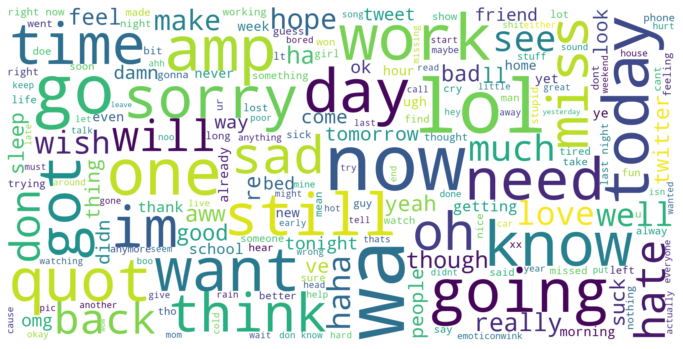

In [15]:
#word cloud with the words that create negative sentiment
neg_tweets = data[data.sentiment == 0]
neg_string = []
for t in neg_tweets.text:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200, background_color='white').generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

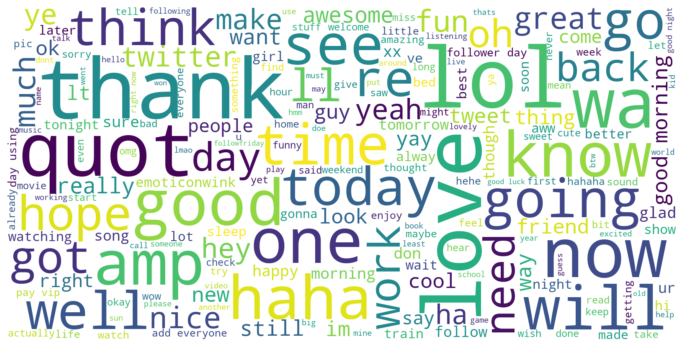

In [16]:
#word cloud with the words that create positive sentiment
pos_tweets = data[data.sentiment == 1]
pos_string = []
for t in pos_tweets.text:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200, background_color='white').generate(pos_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [17]:
#separating development and evaluation set again
from sklearn.model_selection import train_test_split

train_valid_mask = ~data["sentiment"].isna()

X = data.drop(columns=["sentiment"]).values
y = data["sentiment"].values

X_train_valid = X[train_valid_mask] #development set
y_train_valid = y[train_valid_mask] #development set
X_test = X[~train_valid_mask] #evaluation set
y_test = y[~train_valid_mask] #evaluation set

In [18]:
y_test

array([nan, nan, nan, ..., nan, nan, nan])

In [19]:
#splitting the development data set in train and test
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid,y_train_valid, shuffle=True, random_state=42)

In [20]:
X_train

array([['know well should be heading off now night bellaa ily xoxoxoxoxoxoxoxoxoxoxo '],
       ['did you enjoy being on britain got talent you looked beautiful '],
       ['it sure doe like this account their tag line is better wired than tired '],
       ...,
       ['hey guy just got on but now have to get off sorry school have math test and iraq presentation ahh wish me luck chow for now '],
       ['extreme makeover home edition lol '],
       ['good morning ']], dtype=object)

In [21]:
#running tf-idf vectorizer, fitting and transforming the train set and transforming validation and test set
df_X_train = pd.DataFrame(X_train, columns=['text'])
df_X_valid = pd.DataFrame(X_valid, columns=['text'])
df_X_test = pd.DataFrame(X_test, columns=['text'])

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

text_counts_train = tfidf.fit_transform(df_X_train['text'])
text_counts_valid = tfidf.transform(df_X_valid['text'])
text_counts_test = tfidf.transform(df_X_test['text'])

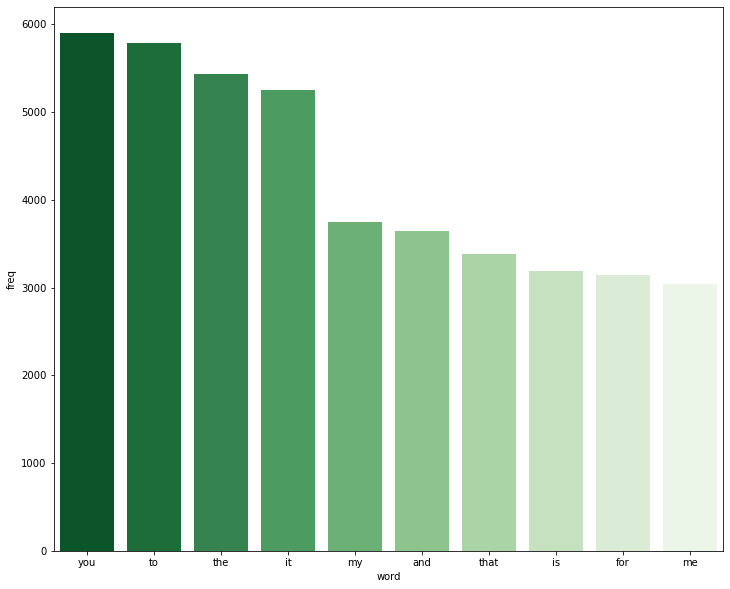

In [26]:
#graphical representation of the frequency of most common words
from collections import Counter
import collections
word_freq = dict(zip(tfidf.get_feature_names(), np.asarray(text_counts_train.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(10), columns = ['word', 'freq'])
fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(x="word", y="freq", data=word_counter_df, palette="Greens_r", ax=ax)
plt.show();

In [28]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV

In [29]:
#function that creates a confussion matrix
def conf_matrix(model):
    cf_matrix = confusion_matrix(y_valid, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap="Greens",fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

         0.0       0.74      0.68      0.71     23791
         1.0       0.78      0.83      0.80     32458

    accuracy                           0.76     56249
   macro avg       0.76      0.75      0.76     56249
weighted avg       0.76      0.76      0.76     56249

Accuracy is 0.7642624757773472


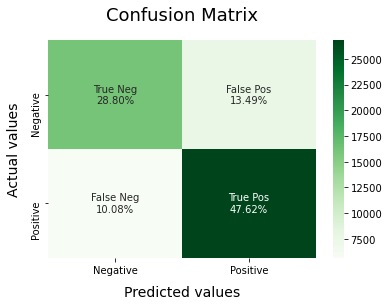

In [30]:
# Fitting the model with Naive Bayes classifier and default parameters 
# Calculating the confussion matrix and accuracy
BNBmodel = BernoulliNB()
BNBmodel.fit(text_counts_train, y_train)
y_pred = BNBmodel.predict(text_counts_valid)
print(classification_report(y_valid, y_pred))
conf_matrix(BNBmodel)
print("Accuracy is",accuracy_score(y_valid, y_pred))

In [31]:
#list of available parameters
BernoulliNB().get_params().keys()

dict_keys(['alpha', 'binarize', 'class_prior', 'fit_prior'])

In [32]:
#tuning the parameters with Randomized Search
param_grid = [
  {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}
 ]

clf1 = RandomizedSearchCV(BNBmodel, param_grid, random_state=0)
search1 = clf1.fit(text_counts_valid, y_valid)

search1.best_params_

/Users/tijanailievska/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'alpha': 0.5}

              precision    recall  f1-score   support

         0.0       0.73      0.70      0.71     23791
         1.0       0.79      0.81      0.80     32458

    accuracy                           0.76     56249
   macro avg       0.76      0.76      0.76     56249
weighted avg       0.76      0.76      0.76     56249

Accuracy is 0.7646180376540027


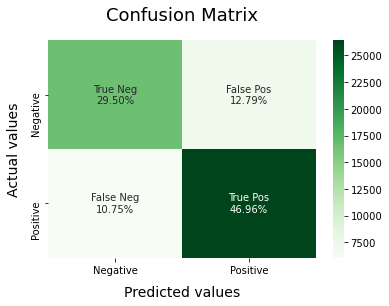

In [33]:
# Fitting the model with Naive Bayes calssifier after hyperparameters tuning 
# Calculating the confussion matrix and accuracy
BNBmodel = BernoulliNB(alpha = 0.5)
BNBmodel.fit(text_counts_train, y_train)
y_pred = BNBmodel.predict(text_counts_valid)
print(classification_report(y_valid, y_pred))
conf_matrix(BNBmodel)
print("Accuracy is",accuracy_score(y_valid, y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.71      0.73     23791
         1.0       0.80      0.83      0.81     32458

    accuracy                           0.78     56249
   macro avg       0.77      0.77      0.77     56249
weighted avg       0.78      0.78      0.78     56249

Accuracy is 0.7790005155647212


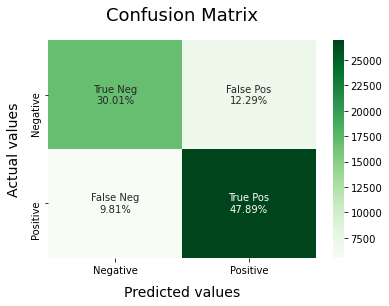

In [34]:
# Fitting the model with LinearSVC and default parameters 
# Calculating the confussion matrix and accuracy
SVCmodel = LinearSVC()
SVCmodel.fit(text_counts_train, y_train)
y_pred = SVCmodel.predict(text_counts_valid)
print(classification_report(y_valid, y_pred))
conf_matrix(SVCmodel)
print("Accuracy is",accuracy_score(y_valid, y_pred))

In [35]:
#list of available parameters
LinearSVC().get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'loss', 'max_iter', 'multi_class', 'penalty', 'random_state', 'tol', 'verbose'])

In [36]:
#tuning the parameters with Randomized Search
param_grid = [
  {'C': [0.01, 0.1, 1, 10]}
 ]

clf2 = RandomizedSearchCV(SVCmodel, param_grid, random_state=0)
search2 = clf2.fit(text_counts_valid, y_valid)

search2.best_params_

/Users/tijanailievska/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'C': 0.1}

              precision    recall  f1-score   support

         0.0       0.77      0.70      0.74     23791
         1.0       0.79      0.85      0.82     32458

    accuracy                           0.79     56249
   macro avg       0.78      0.78      0.78     56249
weighted avg       0.79      0.79      0.78     56249

Accuracy is 0.7866806521004818


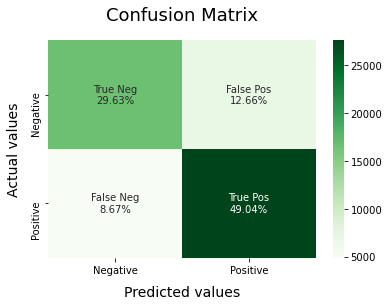

In [37]:
# Fitting the model with LinearSVC after hyperparameters tuning 
# Calculating the confussion matrix and accuracy
SVCmodel = LinearSVC(C = 0.1)
SVCmodel.fit(text_counts_train, y_train)
y_pred = SVCmodel.predict(text_counts_valid)
print(classification_report(y_valid, y_pred))
conf_matrix(SVCmodel)
print("Accuracy is",accuracy_score(y_valid, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74     23791
         1.0       0.80      0.85      0.82     32458

    accuracy                           0.79     56249
   macro avg       0.78      0.78      0.78     56249
weighted avg       0.79      0.79      0.79     56249

Accuracy is 0.7871784387277996


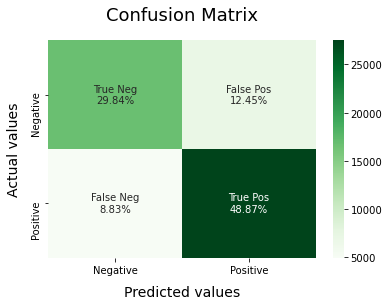

In [38]:
# Fitting the model with Logistic Regression and default parameters 
# Calculating the confussion matrix and accuracy
LRmodel = LogisticRegression(max_iter = 150)
LRmodel.fit(text_counts_train, y_train)
y_pred = LRmodel.predict(text_counts_valid)
print(classification_report(y_valid, y_pred))
conf_matrix(LRmodel)
print("Accuracy is",accuracy_score(y_valid, y_pred))

In [39]:
#list of available parameters
LogisticRegression().get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [40]:
#tuning the parameters with Randomized Search
param_grid = [
  {'C' : [0.01, 0.1, 1, 2, 10, 100, 1000],
    'penalty' : ['l1', 'l2']}
 ]

clf3 = RandomizedSearchCV(LRmodel, param_grid, random_state=0)
search3 = clf3.fit(text_counts_valid, y_valid)

search3.best_params_

/Users/tijanailievska/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/tijanailievska/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tijanailievska/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/tijanailievska/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on th

/Users/tijanailievska/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tijanailievska/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

/Users/tijanailievska/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tijanailievska/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

{'penalty': 'l2', 'C': 2}

/Users/tijanailievska/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74     23791
         1.0       0.80      0.84      0.82     32458

    accuracy                           0.79     56249
   macro avg       0.78      0.78      0.78     56249
weighted avg       0.79      0.79      0.79     56249

Accuracy is 0.7873384415722946


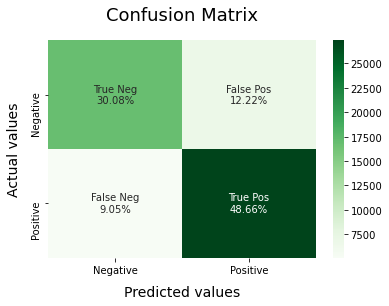

In [41]:
# Fitting the model with Logistic Regression after hyperparameters tuning 
# Calculating the confussion matrix and accuracy

LRmodel = LogisticRegression(C = 2, penalty = 'l2')
LRmodel.fit(text_counts_train, y_train)
y_pred = LRmodel.predict(text_counts_valid)
print(classification_report(y_valid, y_pred))
conf_matrix(LRmodel)
print("Accuracy is",accuracy_score(y_valid, y_pred))

In [42]:
y_pred_test = LRmodel.predict(text_counts_test)

In [43]:
pd.DataFrame(y_pred_test, index=df[~train_valid_mask].index).to_csv("submission.csv",index_label="Id", header=["Predicted"])